<a href="https://colab.research.google.com/github/wynn918/ML/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [5]:
wine=load_wine()
Xtrain, Xtest, Ytrain, Ytest=train_test_split(wine.data, wine.target, test_size=0.3)

In [6]:
clf=DecisionTreeClassifier(random_state=0)
rfc=RandomForestClassifier(random_state=0)

clf=clf.fit(Xtrain,Ytrain)
rfc=rfc.fit(Xtrain,Ytrain)

score_c=clf.score(Xtest,Ytest)
score_r=rfc.score(Xtest,Ytest)

print('Single Tree:{}'.format(score_c)
      ,'Random Forest:{}'.format(score_r))


Single Tree:0.9444444444444444 Random Forest:1.0


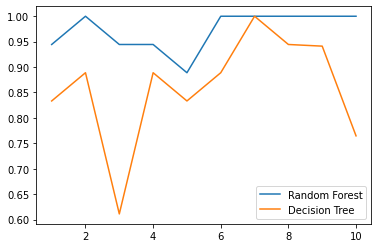

In [7]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc=RandomForestClassifier(n_estimators=25)
rfc_s=cross_val_score(rfc, wine.data, wine.target, cv=10)

clf=DecisionTreeClassifier()
clf_s=cross_val_score(clf, wine.data, wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label='Random Forest')
plt.plot(range(1,11),clf_s,label='Decision Tree')
plt.legend()
plt.show()

0.9888888888888889 13


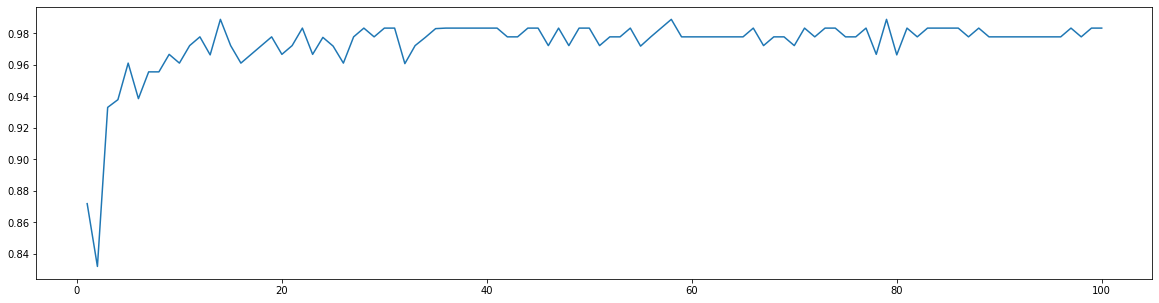

In [9]:
#learning curve
superpa=[]

for i in range(100):
  rfc=RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
  rfc_s=cross_val_score(rfc, wine.data, wine.target,cv=10).mean()
  superpa.append(rfc_s)

print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,101),superpa)
plt.show() 

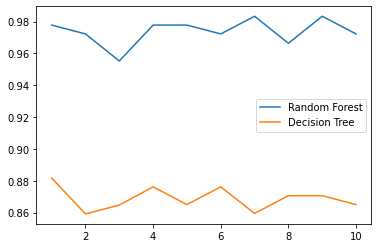

In [10]:
#cross valiation 100 times
rfc_l=[]
clf_l=[]

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)

plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

In [11]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)
#estimators，Check the condition of the trees in the forest rfc.estimators_[0].random_state
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [12]:
#oob_score_: don't need to split data into train and test, just use the 37% oob
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
rfc.oob_score_

0.9438202247191011

In [13]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)

1.0

In [14]:
rfc.feature_importances_

array([0.12283741, 0.02411924, 0.00480242, 0.02441045, 0.0796882 ,
       0.04191553, 0.16673351, 0.0058883 , 0.01820636, 0.2055109 ,
       0.05134503, 0.09841494, 0.15612773])

In [15]:
rfc.apply(Xtest)

array([[11, 13,  9, ...,  7, 15, 13],
       [18, 11, 12, ..., 10, 18, 17],
       [11,  1,  9, ...,  5, 15,  8],
       ...,
       [18, 14, 12, ...,  5, 18, 11],
       [11,  6,  7, ...,  3, 17,  2],
       [15,  6,  7, ...,  3,  7,  2]])

In [16]:
rfc.predict(Xtest)

array([1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1,
       0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 1, 2, 0, 1, 0, 2, 2])

In [17]:
rfc.predict_proba(Xtest)#Returns values greater than 0.5 are classified as 1, values less than 0.5 are classified as 0.

array([[0.12, 0.84, 0.04],
       [1.  , 0.  , 0.  ],
       [0.28, 0.72, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.  , 0.96],
       [1.  , 0.  , 0.  ],
       [0.08, 0.04, 0.88],
       [1.  , 0.  , 0.  ],
       [0.04, 0.08, 0.88],
       [0.08, 0.  , 0.92],
       [0.  , 0.12, 0.88],
       [0.  , 0.08, 0.92],
       [0.  , 0.2 , 0.8 ],
       [0.  , 1.  , 0.  ],
       [0.2 , 0.72, 0.08],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.12, 0.08, 0.8 ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.92, 0.04, 0.04],
       [0.8 , 0.12, 0.08],
       [0.04, 0.08, 0.88],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.32, 0.68],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.92, 0.04, 0.04],
 

In [1]:
# Suppose the probability of a single tree being wrong is 0.2, and the probability of more than 20 trees being wrong is:
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

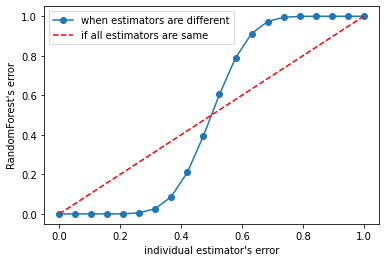

In [8]:
# For different error
x = np.linspace(0,1,20)
y = []

for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
                  for i in range(13,26)]).sum()
    y.append(E)

plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()